In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
rh = pd.read_csv('Human_Resources.csv')

In [3]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Tratamento do DataFrame

In [4]:
rh['Attrition'] = rh['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [5]:
rh.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [6]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


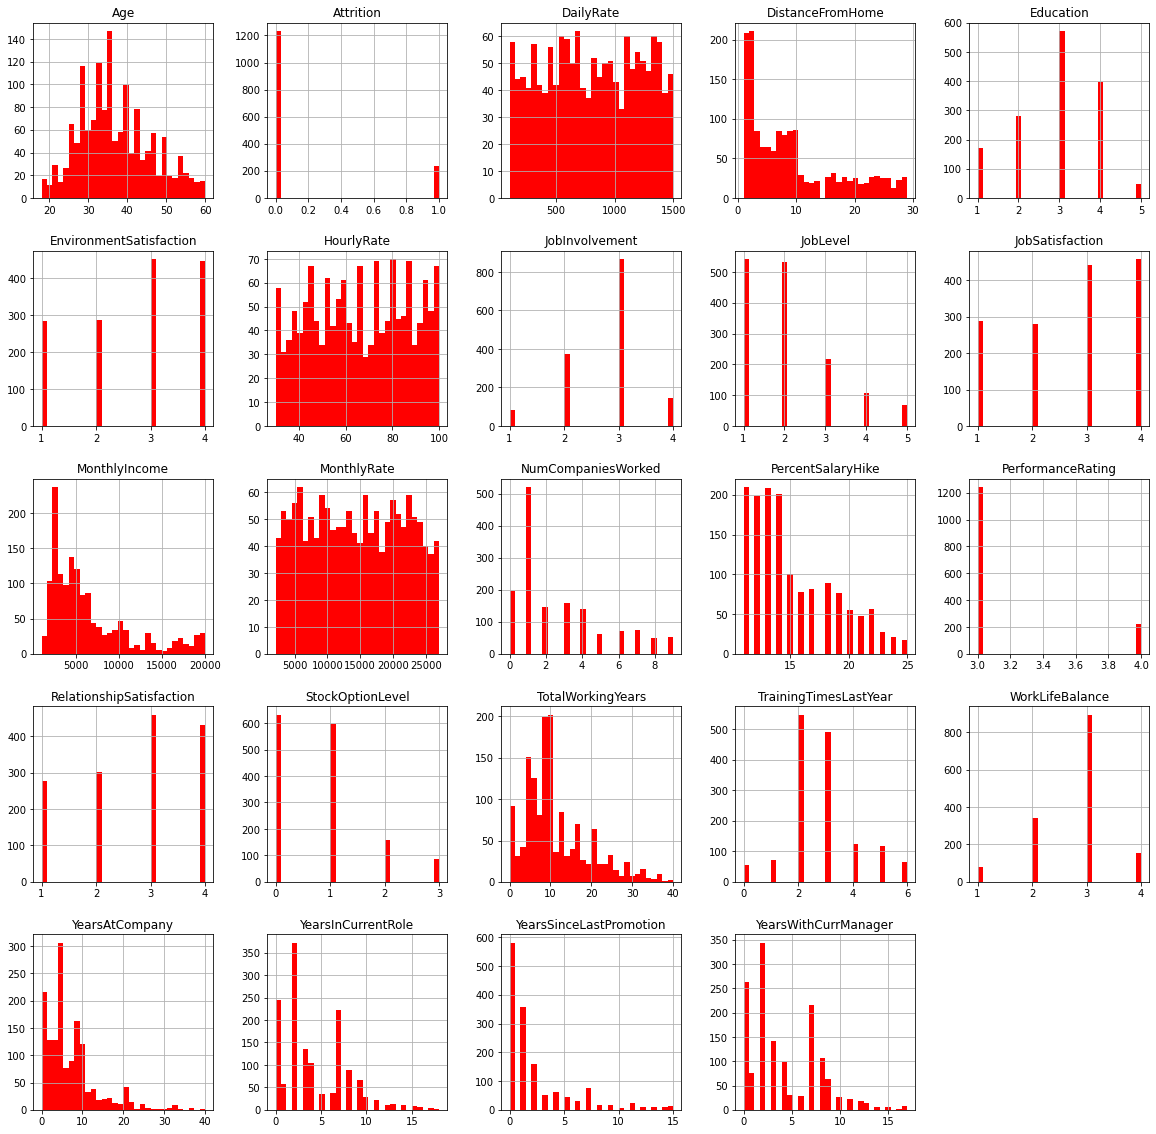

In [7]:
rh.hist(bins=30, figsize=(20,20), color='r');

In [8]:
sairam_rh = rh[rh['Attrition']==1]
permaneceram_rh = rh[rh['Attrition']==0]

# Correlações

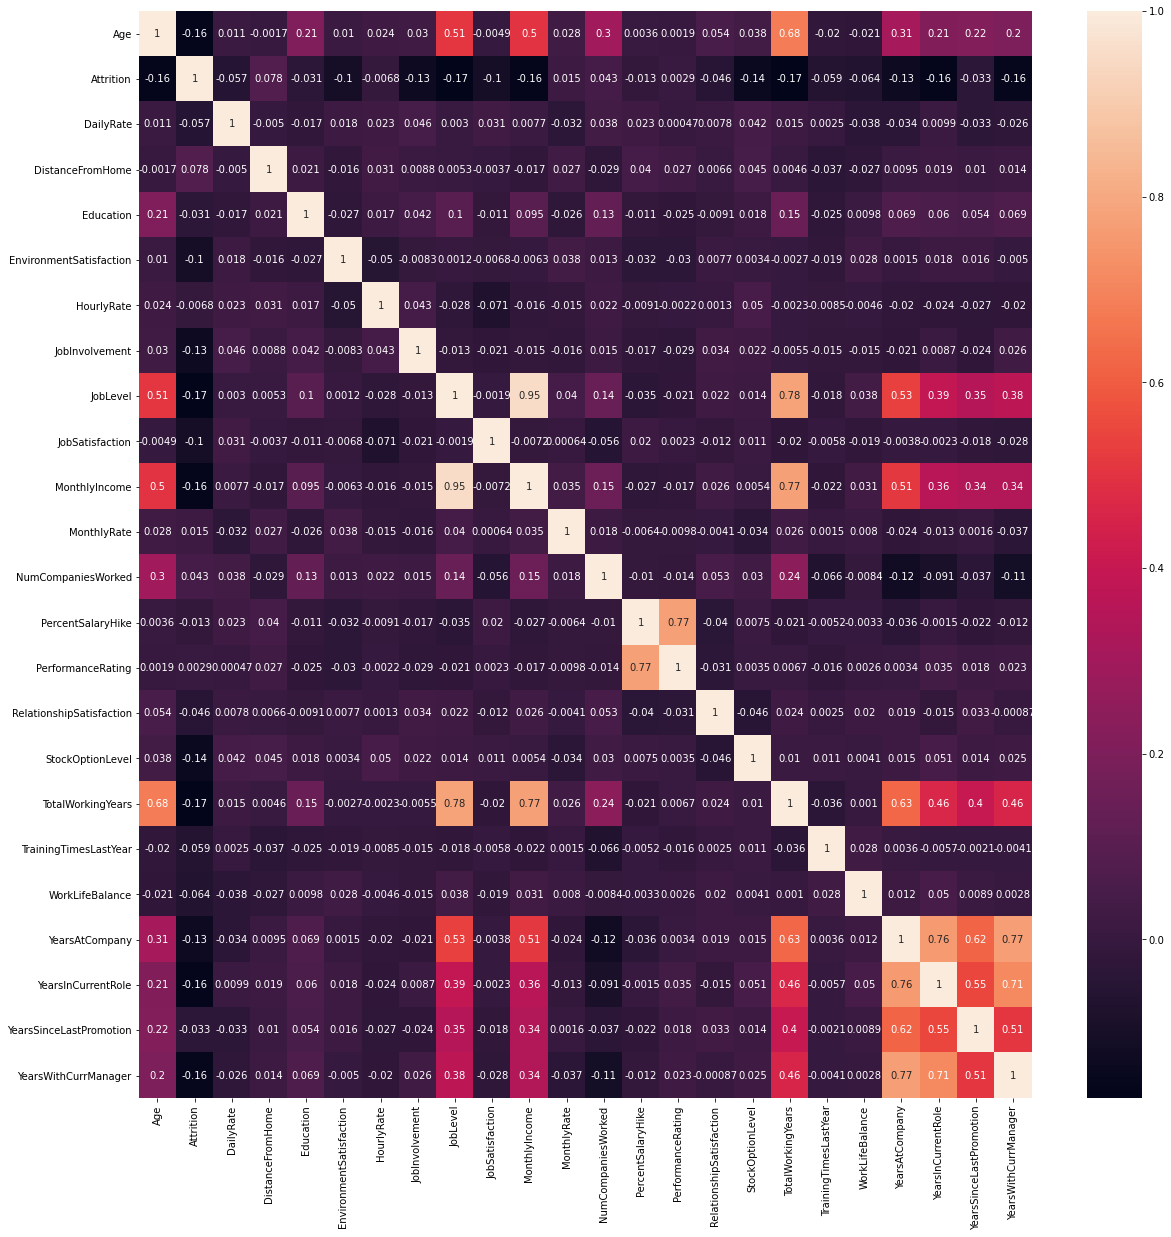

In [9]:
correlacoes = rh.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlacoes, annot=True);

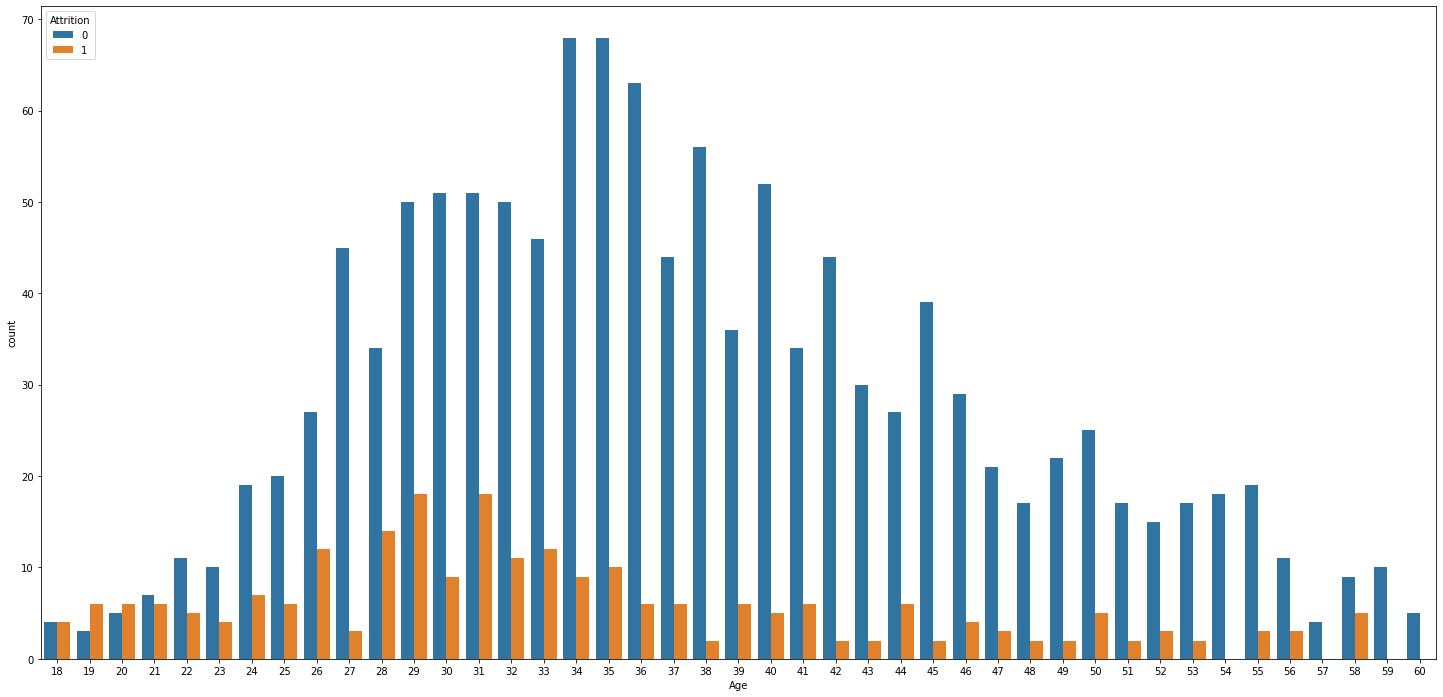

In [10]:
plt.figure(figsize=[25,12])
sns.countplot(x='Age', hue='Attrition', data=rh);

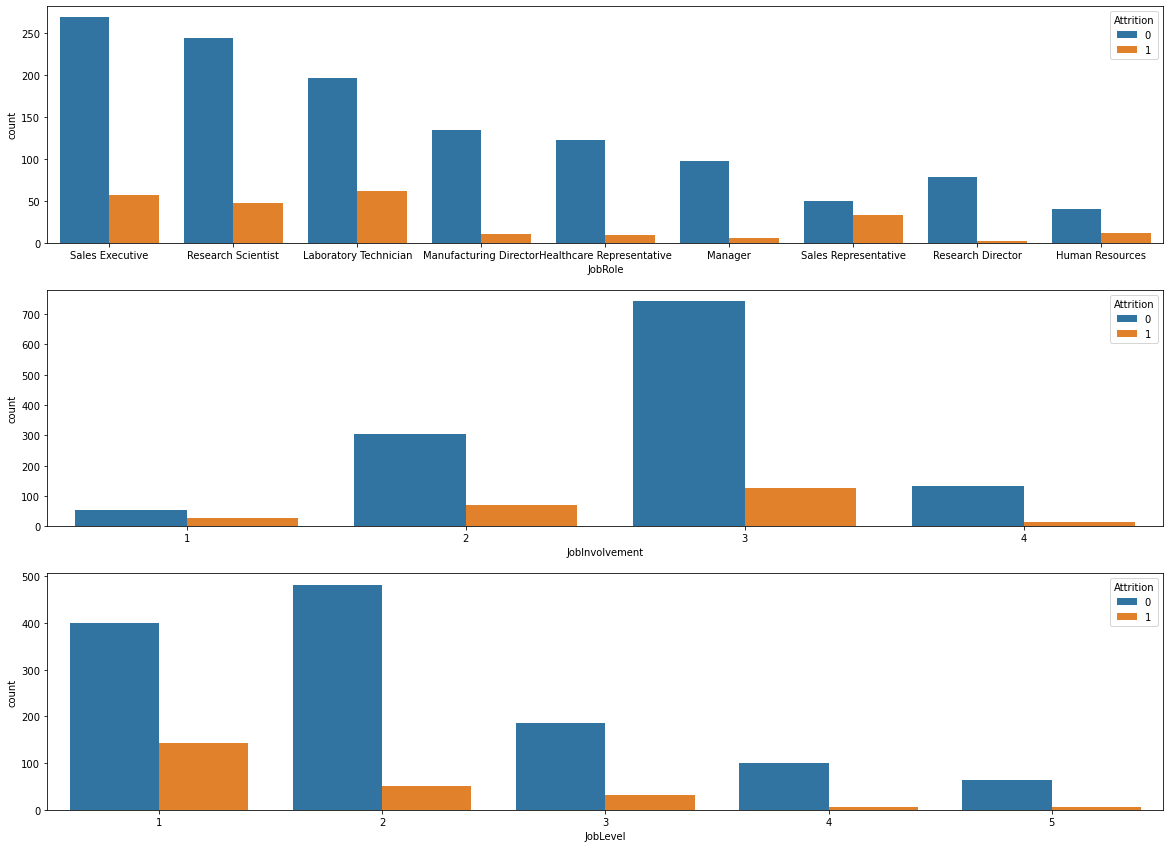

In [11]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=rh);
plt.subplot(412)
sns.countplot(x='JobInvolvement', hue='Attrition', data=rh);
plt.subplot(413)
sns.countplot(x='JobLevel', hue='Attrition', data=rh);

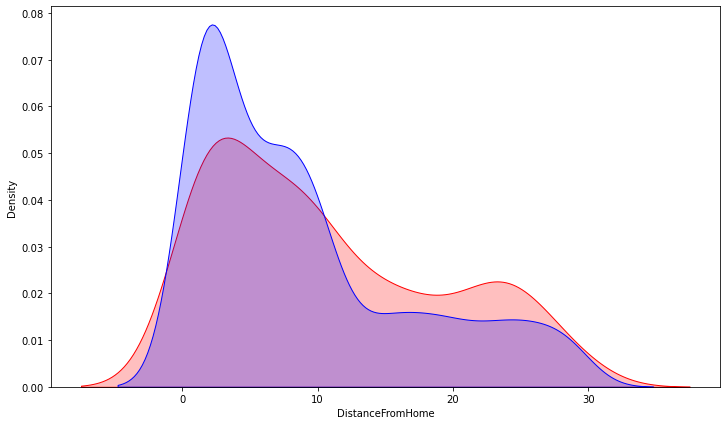

In [12]:
plt.figure(figsize=[12,7])
sns.kdeplot(sairam_rh['DistanceFromHome'], label='Funcionários que saíram', shade=True, color='r');
sns.kdeplot(permaneceram_rh['DistanceFromHome'], label='Funcionários que permaneceram', shade=True, color='b');

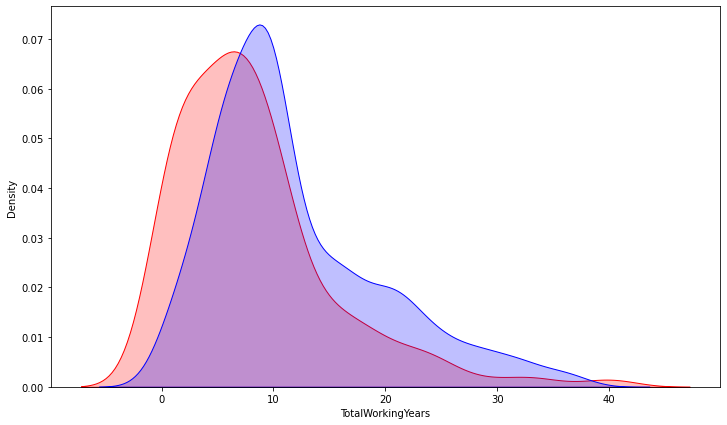

In [13]:
plt.figure(figsize=[12,7])
sns.kdeplot(sairam_rh['TotalWorkingYears'], label='Funcionários que saíram', shade=True, color='r');
sns.kdeplot(permaneceram_rh['TotalWorkingYears'], label='Funcionários que permaneceram', shade=True, color='b');

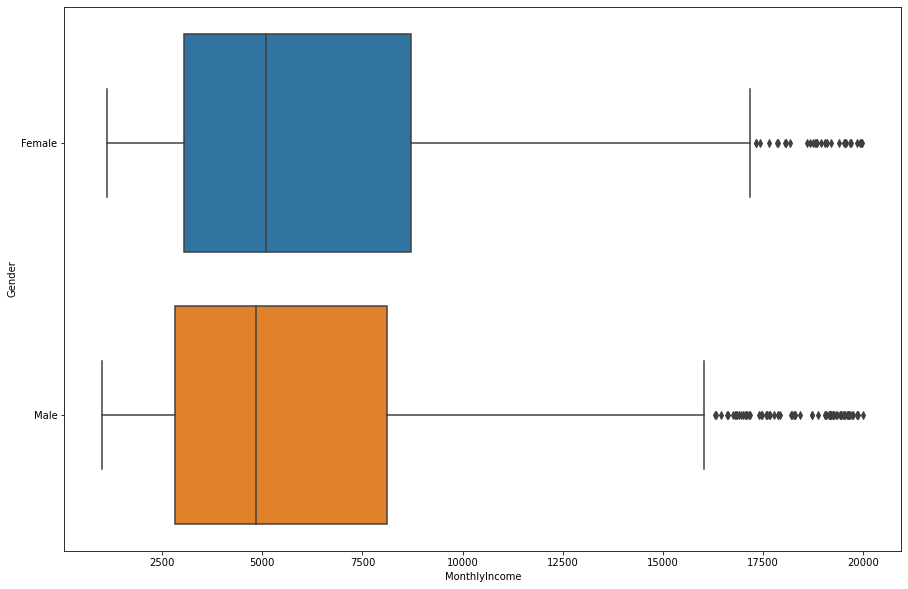

In [14]:
plt.figure(figsize=[15,10])
sns.boxplot(x='MonthlyIncome', y='Gender', data=rh);

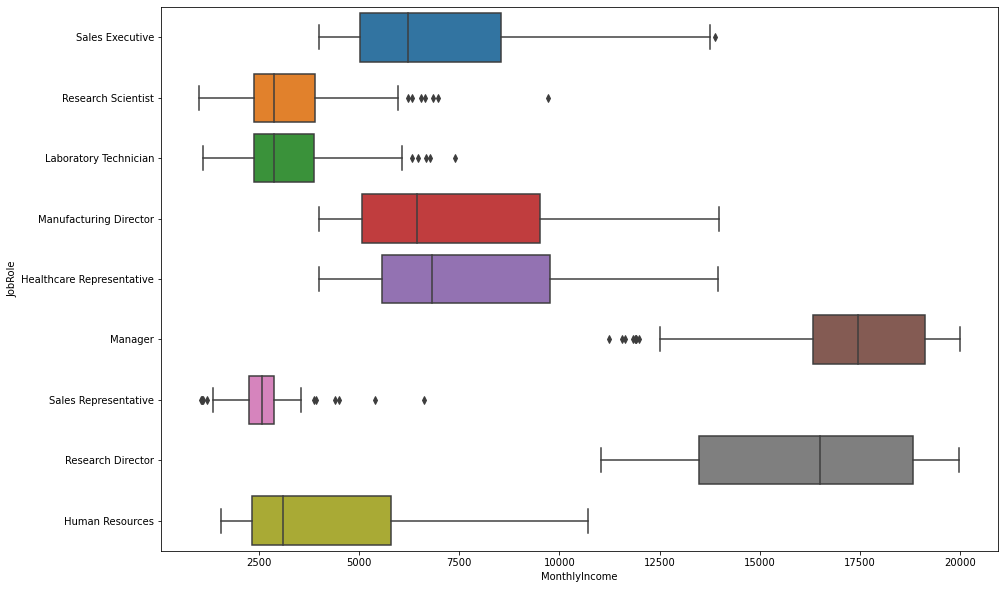

In [15]:
plt.figure(figsize=[15,10])
sns.boxplot(x='MonthlyIncome', y='JobRole', data=rh);

# Pré-Processamento

In [16]:
rh_Cat = rh[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']]
rh_Cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [17]:
from sklearn.preprocessing import OneHotEncoder
onehotenconder = OneHotEncoder()
rh_Cat = onehotenconder.fit_transform(rh_Cat).toarray()

In [18]:
rh_Cat = pd.DataFrame(rh_Cat)

In [19]:
rh_Cat

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
rh_Numerical = rh[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [21]:
rh_Numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [22]:
rh_all = pd.concat([rh_Cat, rh_Numerical], axis=1)

In [23]:
rh_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [24]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x = scaler.fit_transform(rh_all)

In [25]:
x

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [26]:
y = rh['Attrition']

In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# Regressão Logística

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logistic = LogisticRegression()

In [31]:
logistic.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred = logistic.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.904891304347826

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[307,   8],
       [ 27,  26]], dtype=int64)

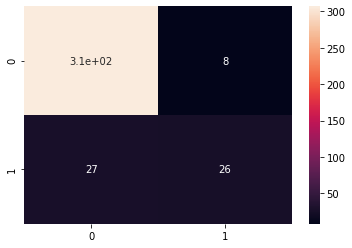

In [38]:
sns.heatmap(cm, annot=True);

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [40]:
precision_score(y_test, y_pred)

0.7647058823529411

In [41]:
recall_score(y_test, y_pred)

0.49056603773584906

In [42]:
f1_score(y_test, y_pred, average='macro')

0.7718860138497777

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       315
           1       0.76      0.49      0.60        53

    accuracy                           0.90       368
   macro avg       0.84      0.73      0.77       368
weighted avg       0.90      0.90      0.90       368



# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = forest.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
accuracy_score(y_test, y_pred)

0.8695652173913043

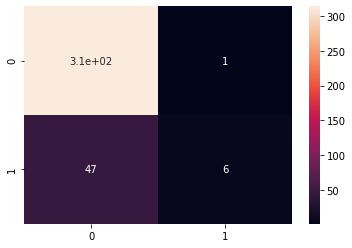

In [48]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       315
           1       0.86      0.11      0.20        53

    accuracy                           0.87       368
   macro avg       0.86      0.56      0.56       368
weighted avg       0.87      0.87      0.82       368



# Redes Neurais Artificias

In [50]:
import tensorflow as tf

In [51]:
x_train.shape

(1102, 51)

In [52]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu', input_shape=(51,)))
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu')) #três camadas ocultas
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #camada de resultado

In [53]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,626
Trainable params: 2,626
Non-trainable params: 0
_________________________________________________________________


In [54]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
rede_neural.fit(x_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 1ms/step - loss: 0.5468 - accuracy: 0.8261
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8252
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8310
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8509
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8378
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8353
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8518
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8626
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8703
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8719
Epoch 11/

In [56]:
Y_pred = rede_neural.predict(x_test)

In [57]:
Y_pred = (Y_pred >= 0.5) # Converterá os valores numéricos maiores/iguais que 0.5 em True

In [58]:
cm = confusion_matrix(y_test, Y_pred)

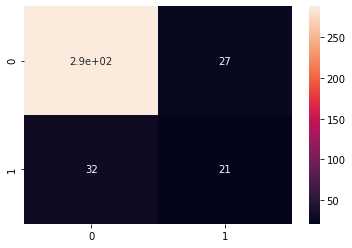

In [59]:
sns.heatmap(cm, annot=True);

In [60]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       315
           1       0.44      0.40      0.42        53

    accuracy                           0.84       368
   macro avg       0.67      0.66      0.66       368
weighted avg       0.83      0.84      0.84       368



# Salvar classificador

In [61]:
import pickle

In [62]:
with open('classificador_rh.pkl', 'wb') as f:
    pickle.dump([scaler, onehotenconder, logistic], f)

In [63]:
with open('classificador_rh.pkl', 'rb') as f:
    min_max, encoder, modelo = pickle.load(f)

In [64]:
min_max, encoder, modelo

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

# Teste do Classificador

In [65]:
X_teste = rh_all.iloc[0:1]
X_teste

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [66]:
X_teste = min_max.transform(X_teste)

In [67]:
modelo.predict(X_teste)

array([1], dtype=int64)

### Probalidade/certeza do resultado

In [69]:
modelo.predict_proba(X_teste)

array([[0.28874389, 0.71125611]])

In [70]:
modelo.classes_

array([0, 1], dtype=int64)